In [46]:
# import common libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data

In [47]:
# load data
df = pd.read_csv('mnist.csv')

In [48]:
# check data
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# data preprocessing

In [49]:
# check summary
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [50]:
# check for missing values
df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [51]:
# separate x and y
x = df.drop('label', axis=1)
y = df['label']

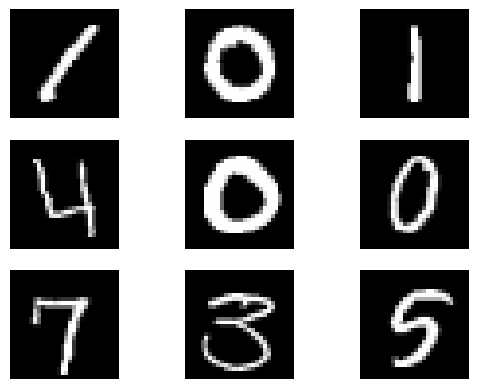

In [52]:
# plotting the first 9 images in the train set of MNIST

fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(x.iloc[cnt].values.reshape((28, 28)), cmap='gray')
         axs[i, j].axis('off')
         cnt += 1

In [53]:
# convert the rows to images (28*28)
x_array = x.values.reshape(-1, 28, 28)

In [54]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_array, y, test_size=0.2, random_state=42)

In order to make the whole data easier to process, we are going to **normalize** it. This means that we scale down all the values so that they end up between 0 and 1.

In [55]:
# normalize the features
# logic??
x_train_n = x_train/255
x_test_n = x_test/255

In [56]:
print('The shape of the training inputs:', x_train_n.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',x_test_n.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (33600, 28, 28)
The shape of the training labels: (33600,)
The shape of the testing inputs: (8400, 28, 28)
The shape of the testing labels: (8400,)


# ANN

## 1. Build Model Architecture

- Firstly, we use the models module from keras to create a new neural network. The Sequential constructor does this for us.

- Then, we start out by adding a so-called Flatten layer as our first layer.
In order to add a layer to our model, we use the add function. Then we can choose the kind of layer that we want from the layers module.
We specified an input shape of 28x28 which represents the resolution of images.
What a flattened layer basically does is it flattens the input and makes it one dimensional. So instead of a 28x28 grid, we end up with 784 neurons lined up.
- We added two dense layers. These are our hidden layers and increase the complexity of our model.
Both layers have 128 neurons each.
The activation function is ReLU function.
Dense layers connect every neuron of this layer with all the neurons of the next and previous layer.
- Last but not least we add an output layer. This one is also a dense layer but it only has 10 neurons and a different activation function.
The values of the 10 neurons indicate how much our model believes that the respective number is the right classification.
The first neuron is for the zero, the second for the one and so on.
The activation function that we use here is the softmax function. This function scales the output values so that they all add upto one. Thus it transforms the absolute values into relative values.

In [57]:
# buld the model architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))              # input layer - how the shape is determined?? and what the flatten layer is doing??
model.add(tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu))   # 1st hidden layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu))   # 2nd hidden layer
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))   # output layer - why are there 10 neurons??

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
# check the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

How are the parameters within layers are determined???
- HINT: y = mx + b

- Before we start training and testing our model, we need to compile it first. This optimizes it and we can also choose a loss function.
An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

## Compile the model

In [59]:
# compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training

Now, we get to the essential part of the whole project - the training and testing.
For this, we just have to use the fit function of our model.

In [60]:
model.fit(x_train_n, y_train, epochs=10, batch_size=100)

Epoch 1/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4130 - loss: 1.9626
Epoch 2/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8307 - loss: 0.7214
Epoch 3/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8710 - loss: 0.4821
Epoch 4/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8876 - loss: 0.4029
Epoch 5/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9012 - loss: 0.3544
Epoch 6/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9097 - loss: 0.3198
Epoch 7/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9111 - loss: 0.3049
Epoch 8/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9178 - loss: 0.2887
Epoch 9/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9225 - loss: 0.2731
Epoch 10/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9228 - loss: 0.2659


## Prediction and Evaluation

In [61]:
prediction = model.predict([x_test_n])
prediction

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.9999919e-05, 7.5986469e-03, 6.4532638e-02, ..., 1.7100827e-04,
        9.1847187e-01, 7.2906038e-04],
       [4.0205610e-05, 9.7056687e-01, 6.3238619e-03, ..., 2.1226367e-03,
        9.6683176e-03, 6.8115251e-04],
       [3.2434225e-05, 5.5749388e-06, 2.2078473e-05, ..., 5.4050010e-02,
        9.9271967e-04, 9.0025944e-01],
       ...,
       [3.1919801e-05, 5.1948264e-06, 3.2660569e-04, ..., 6.0630896e-06,
        8.5253014e-05, 6.2051377e-06],
       [9.3563950e-01, 2.3962509e-06, 6.3491281e-04, ..., 8.5495500e-05,
        2.5132764e-04, 4.4804703e-05],
       [9.7838783e-06, 3.8502549e-05, 2.2321190e-03, ..., 6.7814849e-03,
        7.4628815e-03, 9.6492082e-01]], dtype=float32)

In [62]:
prediction.shape

(8400, 10)

In [63]:
# convert the probabilities into predictoins
pred = prediction.argmax(axis=1)

In [64]:
# evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       816
           1       0.97      0.98      0.97       909
           2       0.93      0.91      0.92       846
           3       0.91      0.89      0.90       937
           4       0.91      0.93      0.92       839
           5       0.89      0.89      0.89       702
           6       0.93      0.96      0.94       785
           7       0.94      0.92      0.93       893
           8       0.90      0.91      0.91       835
           9       0.89      0.89      0.89       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400

[[788   0   1   1   2  11   7   0   5   1]
 [  0 887   2   2   1   3   2   3   9   0]
 [  1   9 768  10  18   5   8   9  17   1]
 [  2   4  16 838   1  28   3  11  19  15]
 [  1   1   7   2 784   1  10   1   4  28]
 [  9   5   3  22   8 622 